In [1]:
# local imports
from experiments import run_experiment, multi_trail_experiment
from utils import running_mean

# global imports
import matplotlib.pyplot as plt
import numpy as np
import gym
#import gym_toytext

In [2]:
# TODO: epsilon decay

In [3]:
default_config = {"num_episodes": 1000,
                  "num_trails": 5,
                  "q_discount_factor": 1.0,
                  "q_alpha": 0.1,
                  "q_epsilon": 0.1,
                  "dq_discount_factor": 1.0,
                  "dq_alpha": 0.1,
                  "dq_epsilon": 0.1,}

100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 12839.44it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 14259.71it/s]


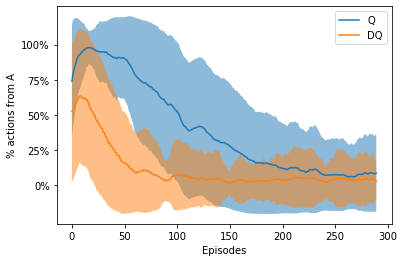

In [9]:
from BiasMDP import BiasMDP

env_name = 'BiasMDP'
environment  = BiasMDP()

config = default_config.copy()
config["num_episodes"] = 300
config["num_trails"] = 50

config["q_epsilon"] = 0.05
config["dq_epsilon"] = 0.05

results = multi_trail_experiment(env_name, environment, config)

smooth = 10
for j in list(results.keys()):
    mean = running_mean(results[j]['episode_length'][0], smooth)
    std = running_mean(results[j]['episode_length'][1], smooth)
    plt.plot(mean, label=f"{j}")
    plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.5)
plt.legend()
plt.ylabel("% actions from A")
plt.xlabel("Episodes")
plt.yticks([1,1.25,1.5,1.75,2], ["0%", "25%", "50%", "75%", "100%"])
plt.savefig(f'figures/{env_name}.pdf', dpi=300)  
plt.show()

C:\Programs\miniconda3\envs\rlcourse\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 170.15it/s]


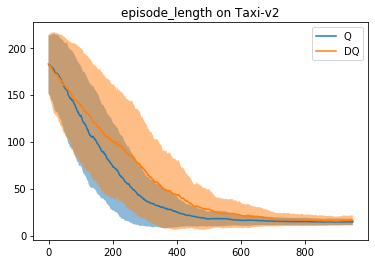

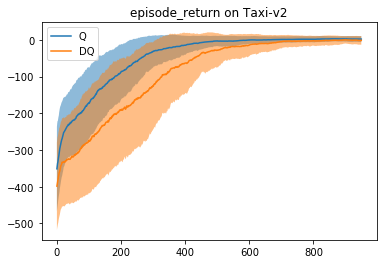

In [5]:
env_name = 'Taxi-v2'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 1000
config["num_trails"] = 10

config["q_alpha"] = 0.2
config["dq_alpha"] = 0.4

results = multi_trail_experiment(env_name, environment, config)

smooth = 50
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

C:\Programs\miniconda3\envs\rlcourse\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:11<00:00, 349.29it/s]


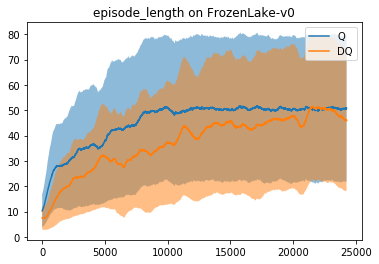

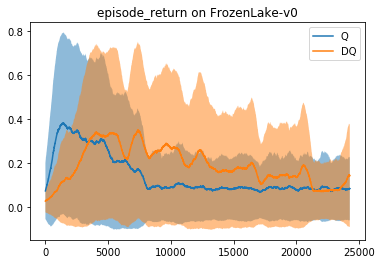

In [6]:
env_name = 'FrozenLake-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 25000
config["num_trails"] = 5

#config["q_alpha"] = 0.2
#config["dq_alpha"] = 0.4

results = multi_trail_experiment(env_name, environment, config)

smooth = 750
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

C:\Programs\miniconda3\envs\rlcourse\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 446.47it/s]


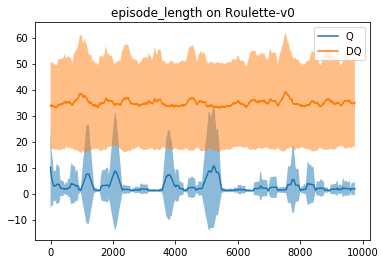

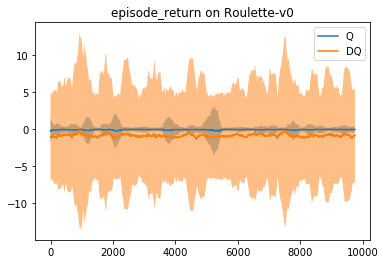

In [7]:
env_name = 'Roulette-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 10000
config["num_trails"] = 10

results = multi_trail_experiment(env_name, environment, config)

smooth = 250
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()

C:\Programs\miniconda3\envs\rlcourse\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6122.13it/s]


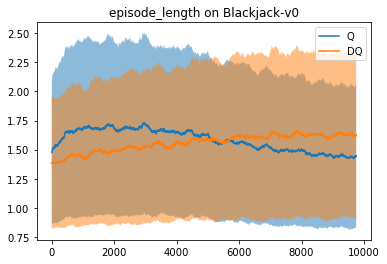

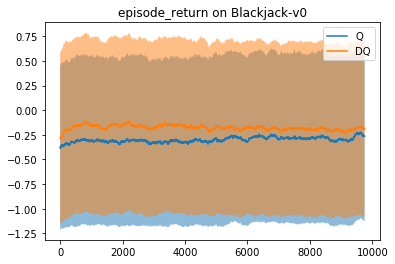

In [8]:
env_name = 'Blackjack-v0'
environment  = gym.make(env_name)

config = default_config.copy()
config["num_episodes"] = 10000
config["num_trails"] = 10

results = multi_trail_experiment(env_name, environment, config)

smooth = 250
keys = list(results.keys())
for i in results[keys[0]].keys():
    for j in keys:
        if i == "q_values":
            pass
        else:
            mean = running_mean(results[j][i][0],smooth)
            std = running_mean(results[j][i][1],smooth)
            plt.plot(mean, label=f"{j}")
            plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    if i == "q_values":
        pass
    else:
        plt.legend()
        plt.title(f'{i} on {env_name}')
        plt.savefig(f'figures/{env_name}_{i}.pdf', dpi=300)
        plt.show()